In [115]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
!ls ../data

sample_submission.csv		      test_ver2.csv
santander-customer-satisfaction.zip   train_ver2.csv
santander-product-recommendation.zip


In [3]:
PATH="../data/"

In [5]:
df_train = pd.read_csv(f"{PATH}train.csv")

In [6]:
df_train.shape

(76020, 371)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


### Check for imbalanced classes - see very imbalanced with few unhappy customer examples

In [12]:
df_train['TARGET'].value_counts(normalize=True)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

In [13]:
df_train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

(0, 80000)

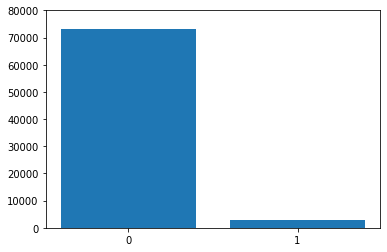

In [32]:
plt.bar(np.arange(2), df_train['TARGET'].value_counts())
plt.xticks([0,1])
plt.ylim(0, 80000)

In [18]:
for col in df_train.columns:
    print(f"{col}: {df_train[col].dtype}")

ID: int64
var3: int64
var15: int64
imp_ent_var16_ult1: float64
imp_op_var39_comer_ult1: float64
imp_op_var39_comer_ult3: float64
imp_op_var40_comer_ult1: float64
imp_op_var40_comer_ult3: float64
imp_op_var40_efect_ult1: float64
imp_op_var40_efect_ult3: float64
imp_op_var40_ult1: float64
imp_op_var41_comer_ult1: float64
imp_op_var41_comer_ult3: float64
imp_op_var41_efect_ult1: float64
imp_op_var41_efect_ult3: float64
imp_op_var41_ult1: float64
imp_op_var39_efect_ult1: float64
imp_op_var39_efect_ult3: float64
imp_op_var39_ult1: float64
imp_sal_var16_ult1: float64
ind_var1_0: int64
ind_var1: int64
ind_var2_0: int64
ind_var2: int64
ind_var5_0: int64
ind_var5: int64
ind_var6_0: int64
ind_var6: int64
ind_var8_0: int64
ind_var8: int64
ind_var12_0: int64
ind_var12: int64
ind_var13_0: int64
ind_var13_corto_0: int64
ind_var13_corto: int64
ind_var13_largo_0: int64
ind_var13_largo: int64
ind_var13_medio_0: int64
ind_var13_medio: int64
ind_var13: int64
ind_var14_0: int64
ind_var14: int64
ind_var17_

In [36]:
len(df_train.columns[df_train.dtypes=='int64'])

260

In [38]:
len(df_train.columns[df_train.dtypes=='float64'])

111

In [42]:
df_train['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [60]:
for col in df_train.columns:
    print(f"{col}: {df_train[col].nunique()}\nDataType: {df_train[col].dtype}\n")

ID: 76020
DataType: int64

var3: 208
DataType: int64

var15: 100
DataType: int64

imp_ent_var16_ult1: 596
DataType: float64

imp_op_var39_comer_ult1: 7551
DataType: float64

imp_op_var39_comer_ult3: 9099
DataType: float64

imp_op_var40_comer_ult1: 293
DataType: float64

imp_op_var40_comer_ult3: 346
DataType: float64

imp_op_var40_efect_ult1: 23
DataType: float64

imp_op_var40_efect_ult3: 29
DataType: float64

imp_op_var40_ult1: 224
DataType: float64

imp_op_var41_comer_ult1: 7421
DataType: float64

imp_op_var41_comer_ult3: 8961
DataType: float64

imp_op_var41_efect_ult1: 331
DataType: float64

imp_op_var41_efect_ult3: 454
DataType: float64

imp_op_var41_ult1: 8032
DataType: float64

imp_op_var39_efect_ult1: 336
DataType: float64

imp_op_var39_efect_ult3: 462
DataType: float64

imp_op_var39_ult1: 8149
DataType: float64

imp_sal_var16_ult1: 66
DataType: float64

ind_var1_0: 2
DataType: int64

ind_var1: 2
DataType: int64

ind_var2_0: 1
DataType: int64

ind_var2: 1
DataType: int64

ind_var

num_venta_var44_hace3: 3
DataType: int64

num_venta_var44_ult1: 9
DataType: int64

num_var45_hace2: 85
DataType: int64

num_var45_hace3: 66
DataType: int64

num_var45_ult1: 94
DataType: int64

num_var45_ult3: 172
DataType: int64

saldo_var2_ult1: 1
DataType: int64

saldo_medio_var5_hace2: 14486
DataType: float64

saldo_medio_var5_hace3: 7787
DataType: float64

saldo_medio_var5_ult1: 14778
DataType: float64

saldo_medio_var5_ult3: 17330
DataType: float64

saldo_medio_var8_hace2: 1325
DataType: float64

saldo_medio_var8_hace3: 439
DataType: float64

saldo_medio_var8_ult1: 2116
DataType: float64

saldo_medio_var8_ult3: 2173
DataType: float64

saldo_medio_var12_hace2: 2834
DataType: float64

saldo_medio_var12_hace3: 1152
DataType: float64

saldo_medio_var12_ult1: 3405
DataType: float64

saldo_medio_var12_ult3: 3447
DataType: float64

saldo_medio_var13_corto_hace2: 1628
DataType: float64

saldo_medio_var13_corto_hace3: 968
DataType: float64

saldo_medio_var13_corto_ult1: 943
DataType: float

## There are several columns with the distribution as below, almost all of the values are zero for a given float column 

In [68]:
df_train['delta_imp_venta_var44_1y3'].value_counts(normalize=True)

 0.000000e+00    0.999408
 1.000000e+10    0.000552
-5.057733e-01    0.000013
 5.417098e+00    0.000013
-1.000000e+00    0.000013
Name: delta_imp_venta_var44_1y3, dtype: float64

### I want to test a theory that this columns do not hold a bunch of statistical information if the vast majority of values are zero, so I will compare two baseline models one with these features and one without, and also look at the feature importances of the xgboost model with these features included (with similar distribution as to above) and see if these features are commonly not split on

#### These columns could also be categorical columsn with just a few erroneously input values, as the above distirbution has almost all 0's some 1's and fewer different values

In [74]:
df_leave_out_many_zeroes = df_train.copy()
columns_potential_leave_out = []
for col in df_leave_out_many_zeroes.columns[df_train.dtypes=="float64"]:
    counts = df_leave_out_many_zeroes[col].value_counts(normalize=True).values
    if np.any(counts>.99):
        columns_potential_leave_out.append(col)
        
    
    

In [75]:
len(columns_potential_leave_out)

68

In [81]:
# values = df_leave_out_many_zeroes['delta_imp_compra_var44_1y3'].value_counts().index

In [82]:
# counts = df_leave_out_many_zeroes['delta_imp_compra_var44_1y3'].value_counts().values

In [83]:
# for val, count in zip(values,counts):
#     print(val,count)

0.0 75918
9999999999.0 70
-1.0 18
2.6505494505000002 1
0.1517506713 1
-0.96848059 1
1.8862041341999998 1
-0.934030473 1
-0.964235374 1
0.33360686170000003 1
-0.475738877 1
-0.97879234 1
-0.6307265160000001 1
0.025623228300000002 1
6.2676078430999995 1
-0.950397506 1
3.654278296 1


In [84]:
df_leave_out_many_zeroes = df_leave_out_many_zeroes.drop(columns_potential_leave_out,axis=1)

In [85]:
df_leave_out_many_zeroes.shape

(76020, 303)

### As XGBoost and other tree based algorithms do not require feature scaling, it is not necessarily crucial that I determine which variables are continuous and which are categorical at this moment

In [86]:
from xgboost import XGBClassifier

In [87]:
model = XGBClassifier()

In [97]:
X, y = df_train.drop(['ID', "TARGET"], axis=1), df_train.iloc[:,-1]

In [ ]:
X.shape

In [101]:
y.shape

(76020,)

In [102]:
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler

In [109]:
scoring = ["average_precision", "roc_auc", "recall"]
scores = cross_validate(model, X,y, scoring=scoring,cv=5)
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_average_precision',
 'test_recall',
 'test_roc_auc']

In [112]:
scores['test_roc_auc']


array([0.83366682, 0.82425038, 0.84203576, 0.85152012, 0.8362442 ])

In [113]:
scores['test_average_precision']

array([0.16962356, 0.16830511, 0.18779763, 0.21036022, 0.18523078])

In [114]:
scores['test_recall']

array([0.00166113, 0.        , 0.00332226, 0.00166389, 0.00332779])

### Test model without the float64 features with >.99 share of 0's 

In [87]:
model = XGBClassifier()

In [97]:
X, y = df_leave_out_many_zeroes.drop(['ID', "TARGET"], axis=1), df_leave_out_many_zeroes.iloc[:,-1]

In [98]:
df_leave_out_many_zeroes.shape

(76020, 371)

In [100]:
X.shape

(76020, 369)

In [101]:
y.shape

(76020,)

In [102]:
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler

In [116]:
scoring = ["average_precision", "roc_auc", "recall"]
scores = cross_validate(model, X,y, scoring=scoring,cv=5)
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_average_precision',
 'test_recall',
 'test_roc_auc']

### We get the same scores meaning that perhaps those 68 features were never split on

In [118]:
print(f"ROC_AUC {scores['test_roc_auc']}")



ROC_AUC [0.83366682 0.82425038 0.84203576 0.85152012 0.8362442 ]


## Try out the model without cross validate

In [122]:
from sklearn.metrics import roc_auc_score

In [119]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [120]:
model = XGBClassifier()

In [121]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [124]:
preds = model.predict_proba(X_val)[:,1]

## Pretty solid performance on a validation score, I am slightly wary to optimize hyperparameters as I do not want to overfit the training set, default XGB model already uses L2 regularization

In [125]:
roc_auc_score(y_val, preds)

0.8327567980881915

## Look into feature importances

In [171]:
series_features = pd.Series(X.columns)

In [172]:
series_feat_importance = pd.Series(model.feature_importances_)

In [177]:
df_importance = pd.concat([series_features, series_feat_importance], axis=1)
df_importance.columns = ["Feature", "Importance"]

In [178]:
df_importance.sort_values(by="Importance", ascending=False)

,Feature,Importance
182,saldo_var30,0.089909
1,var15,0.084875
52,ind_var26_cte,0.068044
280,num_meses_var5_ult3,0.042600
166,saldo_var8,0.033287
...,...,...
144,num_var33,0.000000
143,num_var33_0,0.000000
142,num_var32,0.000000
141,num_var32_0,0.000000


In [180]:
df_importance['Importance'].value_counts()

0.000000    308
0.012117      1
0.005975      1
0.012744      1
0.008281      1
           ... 
0.000964      1
0.029915      1
0.015308      1
0.008778      1
0.007597      1
Name: Importance, Length: 62, dtype: int64

In [185]:
array_features_leave_out = df_importance.loc[df_importance['Importance']==0.0]['Feature'].values


In [186]:
array_features_leave_out.shape

(308,)

## With these anonymous variables hard to determine in real world terms what is important but still important to investigate nevertheless as can see which feature add no value to the model, 308 features had feature importance of 0, I am going to leave these features out of final model, even though they would not hurt model performance 

## Test out model without the features

In [216]:
model = XGBClassifier()

In [219]:
X = X.drop(array_features_leave_out, axis=1)

In [221]:
X.shape

(76020, 61)

In [222]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=False)

In [223]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [224]:
preds = model.predict_proba(X_val)[:,1]

## Model performs a little better without these features

In [225]:
roc_auc_score(y_val, preds)

0.8394345389480684

### As there are such imbalanced classes I want to try ADASYN resampling technique 

##### original target value counts

In [130]:
from collections import Counter

In [131]:
Counter(y)

Counter({0: 73012, 1: 3008})

In [126]:
from imblearn.over_sampling import ADASYN

In [128]:
ada = ADASYN(random_state=42)

In [136]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [137]:
X_res, y_res = ada.fit_resample(X_train, y_train)

In [139]:
Counter(y_train)

Counter({0: 54771, 1: 2244})

In [138]:
Counter(y_res)

Counter({0: 54771, 1: 55089})

In [134]:
model_resample = XGBClassifier()

In [142]:
X_res.shape

(109860, 369)

In [143]:
X_val.shape

(19005, 369)

In [145]:
X_val.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=369)

In [140]:
model_resample.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Was getting error because X_val had column names whereas X_res does not so I converted to numpy array instead

In [148]:
X_val = X_val.to_numpy()

In [149]:
preds = model_resample.predict_proba(X_val)[:,1]

In [150]:
roc_auc_score(y_val, preds)

0.8209122206432721

## ADASYN lowered the validation score, so I will leave this out

### I want to try out a baseline model on the test set and see what score it would receive in the kaggle compeittion (this would obviously not be normally allowed during a live competition as test set results are not available until the end

In [202]:
df_test = pd.read_csv(f"{PATH}test.csv")

In [203]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [204]:
df_test.shape

(75818, 370)

In [205]:
df_sample_submission = pd.read_csv(f"{PATH}sample_submission.csv")

In [206]:
df_sample_submission['TARGET'].value_counts()

0    75818
Name: TARGET, dtype: int64

In [207]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [208]:
ID = df_test.iloc[:,0]

In [209]:
ID

0             2
1             5
2             6
3             7
4             9
          ...  
75813    151831
75814    151832
75815    151833
75816    151834
75817    151837
Name: ID, Length: 75818, dtype: int64

In [210]:
list_features_leave_out = list(array_features_leave_out) + ["ID"]


In [211]:
list_features_leave_out

['imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var6',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26',
 'ind_var25_0',
 'ind_var25',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var30',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var37_cte',
 'ind_var37_0',
 'ind_var37',
 'ind_var39_0',
 'ind_var

In [212]:
len(list_features_leave_out)

309

In [213]:
df_test.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=370)

In [214]:
df_test = df_test.drop(list_features_leave_out,axis=1)

In [226]:
preds = model.predict_proba(df_test)[:,1]

In [227]:
preds

array([0.05830188, 0.0595073 , 0.00220815, ..., 0.00456567, 0.06259934,
       0.00178032], dtype=float32)

In [230]:
preds_series = pd.Series(preds)

In [233]:
df_submission = pd.concat([ID, preds_series],axis=1)

In [235]:
df_submission.columns = ["ID", "TARGET"]

In [236]:
df_submission.head()

,ID,TARGET
0,2,0.058302
1,5,0.059507
2,6,0.002208
3,7,0.012576
4,9,0.002530


In [241]:
df_submission.to_csv("submission.csv", index=False)

In [242]:
!cat submission.csv

ID,TARGET
2,0.05830188
5,0.0595073
6,0.0022081481
7,0.012576325
9,0.0025301182
11,0.22518341
12,0.07199297
15,0.17251478
16,0.04084324
17,0.025062423
19,0.023182051
21,0.004112628
22,0.025286524
24,0.013182826
27,0.01175711
28,0.038942106
30,0.1491262
33,0.0038390846
35,0.014057492
37,0.016351944
38,0.024308976
40,0.17329577
41,0.017910851
44,0.012104303
46,0.08633907
47,0.00854446
48,0.004823025
50,0.0040414715
52,0.16740565
53,0.008677549
55,0.023761261
57,0.0023028157
58,0.0107773105
59,0.01370684
62,0.03724431
63,0.011656131
64,0.029475877
65,0.014552214
67,0.01892167
69,0.04748916
70,0.0038390846
71,0.08906418
72,0.009038071
73,0.0017122494
76,0.006854465
78,0.0031307987
79,0.035452146
81,0.0017096853
85,0.011506538
86,0.004316276
89,0.03688912
94,0.108723864
96,0.0047349576
97,0.014515662
98,0.002602825
99,0.01699286
100,0.2230003
103,0.07634473
104,0.005281442
108,0.008821559
110,0.002847638
112,0.028950881
114,0.019535996
116,0.011553852
117,0.009838841
119,0.007474572
120,0.00

42225,0.019135216
42227,0.003366131
42228,0.0659976
42232,0.008862216
42233,0.0071013523
42235,0.012349604
42239,0.011832285
42242,0.01370684
42244,0.038416103
42245,0.1036696
42247,0.02888608
42248,0.04474845
42249,0.063775815
42250,0.2419548
42251,0.05388775
42254,0.003795146
42255,0.2144581
42256,0.003505467
42258,0.050631065
42259,0.0029870577
42263,0.069293566
42264,0.07135063
42266,0.0042785197
42267,0.009938689
42268,0.016973594
42271,0.0145542445
42273,0.0033291532
42274,0.003363544
42275,0.0077979197
42276,0.0038463203
42277,0.03132679
42278,0.19988994
42280,0.015546882
42283,0.012766302
42284,0.008093064
42287,0.01213008
42289,0.17143154
42291,0.021675775
42293,0.14556459
42295,0.22291149
42302,0.01892167
42306,0.07476232
42307,0.057154145
42308,0.22518341
42309,0.002519565
42312,0.16896841
42316,0.034634545
42319,0.030101674
42321,0.05059033
42322,0.10363597
42323,0.17329577
42325,0.02254368
42328,0.0017456356
42333,0.008318071
42336,0.10718702
42337,0.0025526225
42338,0.011

81639,0.0037386923
81641,0.03559393
81643,0.0054834047
81644,0.0060300035
81650,0.008301579
81651,0.009009289
81653,0.2031221
81656,0.0020649277
81657,0.008677549
81658,0.26482233
81659,0.008888591
81663,0.0018755667
81666,0.14076112
81668,0.01982007
81669,0.0064611635
81672,0.0128930565
81674,0.005198748
81677,0.0047753537
81679,0.018418718
81680,0.009269213
81683,0.101572216
81684,0.023809686
81685,0.00378943
81686,0.012993568
81687,0.029506631
81688,0.17143154
81689,0.009730465
81691,0.033420786
81693,0.10718702
81694,0.018109966
81695,0.05114745
81696,0.12095484
81701,0.02192825
81704,0.08768154
81705,0.0066499673
81706,0.16725296
81708,0.0155626815
81710,0.003494449
81712,0.010623683
81713,0.17143154
81714,0.022650499
81715,0.032839328
81717,0.0030012738
81718,0.010300292
81720,0.0024277086
81721,0.03456862
81722,0.003405283
81723,0.012465915
81725,0.005348857
81726,0.0020708367
81727,0.033452842
81731,0.04726308
81733,0.021875639
81734,0.052329328
81735,0.0020008162
81736,0.01161

124288,0.023760704
124289,0.009176184
124291,0.0017803158
124292,0.01370684
124294,0.014261139
124295,0.03514572
124296,0.018495653
124297,0.06698562
124298,0.04631735
124303,0.052555617
124305,0.03470526
124306,0.011694338
124307,0.01370684
124308,0.02368117
124314,0.028996993
124315,0.14279881
124317,0.010210374
124321,0.039450813
124322,0.043467127
124325,0.01370684
124327,0.029156514
124328,0.05811681
124329,0.14279881
124331,0.043118253
124332,0.01370684
124335,0.02456535
124336,0.0056068157
124337,0.014884632
124339,0.007921519
124340,0.0055982964
124341,0.011070861
124345,0.2261281
124349,0.0064374744
124353,0.0025913785
124354,0.0057917614
124355,0.02749485
124356,0.07948701
124359,0.009972967
124360,0.012865201
124361,0.0036210765
124362,0.013588712
124363,0.05664622
124365,0.014261139
124368,0.021361755
124369,0.121663265
124370,0.029601913
124371,0.0020008162
124374,0.0017572423
124375,0.008248794
124381,0.0070062666
124382,0.08705166
124384,0.006061589
124385,0.022941599
12

In [243]:
!wc -l submission.csv

75819 submission.csv


In [244]:
!pwd

/home/ubuntu/Projects/santander_customer_satisfaction/notebooks
